# Exploring Pandas' features throught the TED Talks dataset

In this tutorial, we will use the TED Talks dataset, available from [Kaggle Datasets](https://www.kaggle.com/rounakbanik/ted-talks) under the [CC BY-NC-SA 4.0 license](https://creativecommons.org/licenses/by-nc-sa/4.0/).

This tutorial is partially based on the [Data Science Best Practices with pandas](https://github.com/justmarkham/pycon-2019-tutorial) tutorial presented by Kevin Markham at PyCon2019 on May 2, 2019.

## Import the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Sometimes you need to know the pandas version you are using, for example, when you need to consult the pandas documentation. You get the pandas version with:

In [2]:
pd.__version__

'1.1.3'

## Load and examine the TED talks dataset

In [3]:
ted = pd.read_csv('data/ted.csv')
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [4]:
ted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

### Check for the presence of missing values

In [5]:
ted.isna().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

Let's identify who are the speakers with missing occupation and if we can identify their occupation from other records (if they gave more than one talk)

In [6]:
no_occupation_speakers = ted.loc[ted.speaker_occupation.isna(),'main_speaker']
no_occupation_speakers

1113      Sonaar Luthra
1192     Rick Falkvinge
1220        Gary Kovacs
1656      Ryan Holladay
1911      Brian Dettmer
1949    Boniface Mwangi
Name: main_speaker, dtype: object

Compute the number of observations (talks) per each speaker

In [7]:
ted.main_speaker.value_counts()

Hans Rosling         9
Juan Enriquez        7
Marco Tempest        6
Rives                6
Julian Treasure      5
                    ..
Vikram Patel         1
Mariana Mazzucato    1
Cosmin Mihaiu        1
Sebastian Kraves     1
Bastian Schaefer     1
Name: main_speaker, Length: 2156, dtype: int64

Among all speakers, select those with the missing occupation

In [8]:
ted.main_speaker.value_counts()[no_occupation_speakers.values]

Sonaar Luthra      1
Rick Falkvinge     1
Gary Kovacs        1
Ryan Holladay      1
Brian Dettmer      1
Boniface Mwangi    1
Name: main_speaker, dtype: int64

Unfortunately, there are no additional records that could be used to fill the missing occupation values.

### Transform filming date and publication date into datetime columns

In [9]:
ted['film_date'].head()

0    1140825600
1    1140825600
2    1140739200
3    1140912000
4    1140566400
Name: film_date, dtype: int64

Note that film date is given as *Unix epoch time*, that is, the number of seconds that have elapsed since January 1, 1970. 

For more about epoch time, see: https://www.epochconverter.com/

In [10]:
ted['filming_date'] = pd.to_datetime(ted['film_date'], unit='s')

In [11]:
ted.filming_date.head()

0   2006-02-25
1   2006-02-25
2   2006-02-24
3   2006-02-26
4   2006-02-22
Name: filming_date, dtype: datetime64[ns]

In [12]:
ted.published_date.head()

0    1151367060
1    1151367060
2    1151367060
3    1151367060
4    1151440680
Name: published_date, dtype: int64

Also, published date is recorded as Unix epoch time

In [13]:
ted['publication_date'] = pd.to_datetime(ted['published_date'], unit='s')

In [14]:
ted.sample(5)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,filming_date,publication_date
1641,80,Snow Dragon. Pure Imagination. Frozen Minotaur...,482,TEDYouth 2013,1384560000,26,Eddy Cartaya,Eddy Cartaya: My glacier cave discoveries,1,1386777481,"[{'id': 3, 'name': 'Courageous', 'count': 21},...","[{'id': 89, 'hero': 'https://pe.tedcdn.com/ima...",Cave Explorer,"['TEDYouth', 'exploration']",My glacier cave discoveries,https://www.ted.com/talks/eddy_cartaya_my_glac...,666996,2013-11-16,2013-12-11 15:58:01
2320,90,"With warmth and wit, Halla Tómasdóttir shares ...",1158,TEDWomen 2016,1477612800,22,Halla Tómasdóttir,Halla Tómasdóttir: It's time for women to run ...,1,1478274563,"[{'id': 3, 'name': 'Courageous', 'count': 233}...","[{'id': 1030, 'hero': 'https://pe.tedcdn.com/i...",Change catalyst,"['Gender equality', 'culture', 'democracy', 'g...",It's time for women to run for office,https://www.ted.com/talks/halla_tomasdottir_it...,877915,2016-10-28,2016-11-04 15:49:23
2499,46,Artist Titus Kaphar makes paintings and sculpt...,772,TED2017,1492992000,12,Titus Kaphar,Titus Kaphar: Can art amend history?,1,1501599710,"[{'id': 10, 'name': 'Inspiring', 'count': 94},...","[{'id': 2532, 'hero': 'https://pe.tedcdn.com/i...",Artist,"['art', 'history', 'identity', 'inequality', '...",Can art amend history?,https://www.ted.com/talks/titus_kaphar_can_art...,890748,2017-04-24,2017-08-01 15:01:50
2325,106,"Now more than ever, it's important to look bol...",1129,TEDWomen 2016,1477526400,16,Kimberlé Crenshaw,Kimberlé Crenshaw: The urgency of intersection...,2,1479140461,"[{'id': 26, 'name': 'Obnoxious', 'count': 21},...","[{'id': 1378, 'hero': 'https://pe.tedcdn.com/i...",Civil rights advocate,"['activism', 'community', 'gender', 'humanity'...",The urgency of intersectionality,https://www.ted.com/talks/kimberle_crenshaw_th...,857330,2016-10-27,2016-11-14 16:21:01
5,672,"Tony Robbins discusses the ""invisible forces"" ...",1305,TED2006,1138838400,36,Tony Robbins,Tony Robbins: Why we do what we do,1,1151440680,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'...","[{'id': 229, 'hero': 'https://pe.tedcdn.com/im...",Life coach; expert in leadership psychology,"['business', 'culture', 'entertainment', 'goal...",Why we do what we do,https://www.ted.com/talks/tony_robbins_asks_wh...,20685401,2006-02-02,2006-06-27 20:38:00


### Drop columns that are no longer needed

In [15]:
ted.drop(columns=['film_date', 'published_date'], inplace=True)

In [16]:
ted.columns

Index(['comments', 'description', 'duration', 'event', 'languages',
       'main_speaker', 'name', 'num_speaker', 'ratings', 'related_talks',
       'speaker_occupation', 'tags', 'title', 'url', 'views', 'filming_date',
       'publication_date'],
      dtype='object')

### How to change columns' names? 

The most flexible method for renaming columns is the `rename()` method. One should pass it a dictionary in which the keys are the old column names and the values are the new names, and specify the axis to be 'columns'.

For example, rename columns 'comments' and 'views' to 'comment_count' and 'view_count', respectively

In [17]:
ted = ted.rename({'comments':'comment_count', 'views':'view_count'}, axis='columns')

In [18]:
ted.columns

Index(['comment_count', 'description', 'duration', 'event', 'languages',
       'main_speaker', 'name', 'num_speaker', 'ratings', 'related_talks',
       'speaker_occupation', 'tags', 'title', 'url', 'view_count',
       'filming_date', 'publication_date'],
      dtype='object')

In case you may need that, you can get column names as a list, as follows:

In [19]:
ted.columns.values.tolist()

['comment_count',
 'description',
 'duration',
 'event',
 'languages',
 'main_speaker',
 'name',
 'num_speaker',
 'ratings',
 'related_talks',
 'speaker_occupation',
 'tags',
 'title',
 'url',
 'view_count',
 'filming_date',
 'publication_date']

## Task 1: Compute and plot the number of talks that took place each year

To do this, we need to extract the year from the filming date, and group talks on the year basis

In [20]:
ted['event_year'] = ted['filming_date'].dt.year
ted.event_year.head()

0    2006
1    2006
2    2006
3    2006
4    2006
Name: event_year, dtype: int64

Compute the number of talks per year

In [21]:
ted.event_year.value_counts()

2013    270
2011    270
2010    267
2012    267
2016    246
2015    239
2014    237
2009    232
2007    114
2017     98
2008     84
2005     66
2006     50
2003     33
2004     33
2002     27
1998      6
2001      5
1983      1
1991      1
1994      1
1990      1
1984      1
1972      1
Name: event_year, dtype: int64

Note that the counts are by default sorted in descending order of count value. This is fine if we are interested in identifying years with the highest / lowest number of talks. <br>
However, if we want to plot the number of talks per year, we need the talk counts ordered based on the year. To get that, we can do the sort based on the index:

In [22]:
talks_per_year = ted.event_year.value_counts()
talks_per_year.sort_index(inplace=True)

In [23]:
talks_per_year

1972      1
1983      1
1984      1
1990      1
1991      1
1994      1
1998      6
2001      5
2002     27
2003     33
2004     33
2005     66
2006     50
2007    114
2008     84
2009    232
2010    267
2011    270
2012    267
2013    270
2014    237
2015    239
2016    246
2017     98
Name: event_year, dtype: int64

Now, we can plot talk counts across years

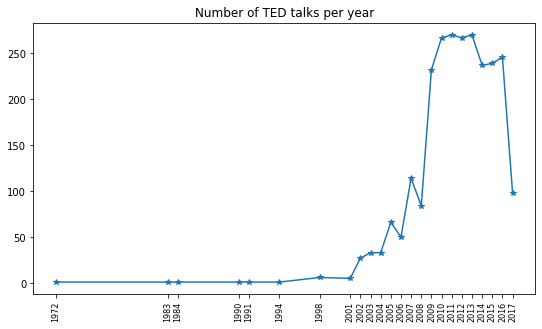

In [24]:
plt.figure(figsize=(9,5))
plt.plot(talks_per_year.index, talks_per_year.values, marker='*')
plt.xticks(talks_per_year.index, rotation='vertical', size=8)
plt.title("Number of TED talks per year")
plt.show()

## Task 2: Which TED events attracted the most attention?

Consider the number of views as a proxy of an event's attractiveness

In [25]:
ted.head()

,comment_count,description,duration,event,languages,main_speaker,name,num_speaker,ratings,related_talks,speaker_occupation,tags,title,url,view_count,filming_date,publication_date,event_year
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006-02-25,2006-06-27 00:11:00,2006
1,265,With the same humor and humanity he exuded in ...,977,TED2006,43,Al Gore,Al Gore: Averting the climate crisis,1,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,2006-02-25,2006-06-27 00:11:00,2006
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,26,David Pogue,David Pogue: Simplicity sells,1,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,2006-02-24,2006-06-27 00:11:00,2006
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,35,Majora Carter,Majora Carter: Greening the ghetto,1,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,2006-02-26,2006-06-27 00:11:00,2006
4,593,You've never seen data presented like this. Wi...,1190,TED2006,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,2006-02-22,2006-06-27 20:38:00,2006


Compute average number of views per talk during each event

In [26]:
ted.groupby('event').view_count.mean().sort_values(ascending=False)

event
TEDxPuget Sound           34309432.0
TEDxHouston               16140250.5
TEDxBloomington            9484259.5
TEDxCreativeCoast          8444981.0
TEDxNorrkoping             6569493.0
                             ...    
TEDxNASA@SiliconValley      155895.0
AORN Congress               149818.0
TEDxWaterloo                138812.0
TEDxIslay                   120274.0
The Do Lectures             112321.0
Name: view_count, Length: 355, dtype: float64

It might be the case that some of these events got high mean views due to having a small number of very popular talks, or even just one very popular talk. So, consider also the number of talks at each event.

To aggregate data based on more than one function (e.g., in this case, mean and count), we can follow `groupby()` with the `agg()` function that receives a list of aggregation functions we want to apply to the grouped data.

In [27]:
ted.groupby('event').view_count.agg(['count', 'mean']).head()

,count,mean
event,,
AORN Congress,1,149818.0
Arbejdsglaede Live,1,971594.0
BBC TV,1,521974.0
Bowery Poetry Club,1,676741.0
Business Innovation Factory,3,304086.0


Let's store the results in a new data frame

In [28]:
events_views = ted.groupby('event').view_count.agg(['count', 'mean'])

In [29]:
events_views.columns = ['talk_count', 'mean_views']

Now, we can examine, for each event, both the average number of views and number of talks

In [30]:
events_views.sort_values(by='mean_views', ascending=False).head(10)

,talk_count,mean_views
event,,
TEDxPuget Sound,1,34309432.0
TEDxHouston,2,16140250.5
TEDxBloomington,2,9484259.5
TEDxCreativeCoast,1,8444981.0
TEDxNorrkoping,1,6569493.0
TEDxUW,1,5917201.0
TEDxLinnaeusUniversity,1,4984884.0
TEDxGoldenGatePark 2012,1,4811180.0
TEDxCHUV,1,4682458.0


Note that all top 10 events (based on the average views) had at most 2 talks. <br>
Let's check the stats for the number of talks and mean views per event

In [31]:
events_views.describe()

,talk_count,mean_views
count,355.000000,3.550000e+02
mean,7.183099,1.527689e+06
std,15.265735,2.205832e+06
min,1.000000,1.123210e+05
25%,1.000000,7.594215e+05
50%,2.000000,1.187105e+06
75%,5.000000,1.715774e+06
max,84.000000,3.430943e+07


Let's consider only those events with above average number of talks. Considering highly skewed distribution, use median as the average value

In [32]:
avg_talk_cnt = events_views.describe().loc['50%', 'talk_count']

In [33]:
events_views.loc[events_views.talk_count > avg_talk_cnt, :].sort_values(by='mean_views', ascending=False)

,talk_count,mean_views
event,,
TED Talks Education,8,4.375104e+06
TEDGlobal>Geneva,11,3.385408e+06
TED2006,45,3.274345e+06
TEDxManhattanBeach,3,3.251704e+06
TEDSalon NY2013,11,2.861639e+06
...,...,...
TEDxYYC,3,3.699607e+05
Business Innovation Factory,3,3.040860e+05
TEDxPhoenix,4,2.846855e+05


## Task 3: Explore talks based on their ratings

In [34]:
ted.ratings.head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [35]:
ted.ratings[0]

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

Even though it looks like a list, it is not

In [36]:
type(ted.ratings[0])

str

To convert it into a list - so that it can be further processed - we will use a function from the Python's `ast` (*Abstract Syntax Tree*) module:

`literal_eval()` function allows one to evaluate a string containing a Python literal or container, that is, it can be used to transform a string into a literal value, a list, a tuple or any other container object

In [37]:
import ast

ast.literal_eval('(1,2,3,4)')

(1, 2, 3, 4)

In [38]:
ast.literal_eval(ted.ratings[0])

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [39]:
type(ast.literal_eval(ted.ratings[0]))

list

Create a new column for storing ratings as a list, instead of a string.

We will use the `apply()` f. to apply the `ast.literal_eval()` f. to each value of the ratings column

In [40]:
ted['ratings_list'] = ted.ratings.apply(ast.literal_eval)

In [41]:
ted.ratings_list.head(3)

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
Name: ratings_list, dtype: object

### Task 3.1: For each talk, find the 3 most frequent ratings

Add a column with a tuple comprising names of the 3 most frequent ratings 

In [42]:
ted.ratings_list[0]

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

Let's create a function that will receive a list of ratings for one talk and return a tuple with the 3 most frequent ratings

In [43]:
def most_freq_ratings(ratings):
    sorted_ratings = sorted(ratings, key=lambda rating: rating['count'], reverse=True)
    return tuple([rating['name'] for rating in sorted_ratings[:3]])

In [44]:
most_freq_ratings(ted.ratings_list[0])

('Inspiring', 'Funny', 'Persuasive')

Now, apply the function to the ratings_list of each talk

In [45]:
ted['top3_ratings'] = ted.ratings_list.apply(most_freq_ratings)

In [46]:
ted.loc[:, ['title', 'top3_ratings']].head(10)

,title,top3_ratings
0,Do schools kill creativity?,"(Inspiring, Funny, Persuasive)"
1,Averting the climate crisis,"(Funny, Informative, Inspiring)"
2,Simplicity sells,"(Funny, Informative, Inspiring)"
3,Greening the ghetto,"(Inspiring, Courageous, Persuasive)"
4,The best stats you've ever seen,"(Informative, Fascinating, Jaw-dropping)"
5,Why we do what we do,"(Inspiring, Persuasive, Fascinating)"
6,Letting go of God,"(Funny, Courageous, Inspiring)"
7,Behind the design of Seattle's library,"(Ingenious, Inspiring, Fascinating)"
8,Let's teach religion -- all religion -- in sch...,"(Persuasive, Informative, Courageous)"
9,A life of purpose,"(Inspiring, Persuasive, Unconvincing)"


### Task 3.2 Which TED events had the most 'Jaw-dropping' talks?

This task can be interpreted in different ways. One way is that we qualify a talk as *jaw-dropping* if 'Jaw dropping' ratings were among the top 3 most frequent ratings for that talk.

Let's start by taking a subset of the data frame with only those talk that are *jaw-dropping*, as qualified above

In [47]:
is_jaw_dropping = lambda ratings: 'Jaw-dropping' in ratings

jaw_dropping_talks = ted.loc[ted.top3_ratings.apply(is_jaw_dropping)]

Note the selection based on a condition expressed as a function of column (top3_ratings) values

In [48]:
jaw_dropping_talks.top3_ratings.head(5)

4     (Informative, Fascinating, Jaw-dropping)
13      (Jaw-dropping, Ingenious, Fascinating)
15        (Jaw-dropping, Beautiful, Inspiring)
16        (Jaw-dropping, Beautiful, Inspiring)
58      (Jaw-dropping, Beautiful, Fascinating)
Name: top3_ratings, dtype: object

In [49]:
jaw_dropping_talks.shape

(206, 20)

Group, now, the jaw-dropping talks based on the event, and count the number of talks in each group 

In [50]:
jaw_dropping_talks.groupby('event').top3_ratings.count()

event
Eric Whitacre's Virtual Choir    1
INK Conference                   1
Michael Howard Studios           1
Mission Blue Voyage              1
Serious Play 2008                1
                                ..
TEDxTC                           1
TEDxUMKC                         1
TEDxUSC                          3
TEDxVictoria                     1
TEDxWarwick                      1
Name: top3_ratings, Length: 67, dtype: int64

To identify the jaw-dropping ones, sort the counts

In [51]:
jaw_dropping_talks.groupby('event').top3_ratings.count().sort_values(ascending=False)

event
TED2007                          17
TED2009                          16
TED2013                          14
TED2008                          11
TED2011                          10
                                 ..
TEDMED 2016                       1
TEDMED 2011                       1
TEDGlobal>London                  1
TEDGlobal 2014                    1
Eric Whitacre's Virtual Choir     1
Name: top3_ratings, Length: 67, dtype: int64

### Task 3.3 Compute the number of positive, negative, and neutral ratings, then add one column for each of these counts

This practically means that we should add 3 columns - pos_ratings, neg_ratings, neutral_ratings - with the corresponding rating counts.

We will achieve this through a multistep process:

1) Identify different kinds of rating categories that have been used to characterise talks and classify them as positive, negative, or neutral

2) create a function for computing the number of ratings in each of the 3 classes (positive, negative, neutral)

3) add a column - ratings_counts - storing the computed values as tuples of the form (pos_ratings, neg_ratings, neutral_ratings)

4) transform the ratings_counts column into 3 columns: pos_ratings, neg_ratings, neutral_ratings 

**Step 1.1**: Identify different kinds of rating categories 

In [52]:
get_rating_categories = lambda ratings: [r['name'] for r in ratings]

ted['rating_categories'] = ted.ratings_list.apply(get_rating_categories)
ted.rating_categories.head()

0    [Funny, Beautiful, Ingenious, Courageous, Long...
1    [Funny, Courageous, Confusing, Beautiful, Unco...
2    [Funny, Courageous, Ingenious, Beautiful, Unco...
3    [Courageous, Beautiful, Confusing, Funny, Inge...
4    [Ingenious, Funny, Beautiful, Courageous, Long...
Name: rating_categories, dtype: object

Next, we need to identify unique rating categories across all the categories lists

In [53]:
rating_categories_set = set()
for rcategoires in ted.rating_categories:
    rating_categories_set.update(rcategoires) # update allows for adding multiple elements at once

rating_categories_set

{'Beautiful',
 'Confusing',
 'Courageous',
 'Fascinating',
 'Funny',
 'Informative',
 'Ingenious',
 'Inspiring',
 'Jaw-dropping',
 'Longwinded',
 'OK',
 'Obnoxious',
 'Persuasive',
 'Unconvincing'}

**Step 1.2**: Classify rating categories as positive, negative, or neutral

In [54]:
negative = {'Confusing','Longwinded', 'Obnoxious', 'Unconvincing'}
neutral = {'OK'}
positive = rating_categories_set - (negative | neutral)

In [55]:
positive

{'Beautiful',
 'Courageous',
 'Fascinating',
 'Funny',
 'Informative',
 'Ingenious',
 'Inspiring',
 'Jaw-dropping',
 'Persuasive'}

**Step 2**: Create a function that computes the number of ratings in each of the 3 classes (positive, negative, neutral)

In [56]:
def pos_neg_neutral_ratings_count(ratings):
    pos_cnt = neg_cnt = neutral_cnt = 0
    for rating in ratings:
        if rating['name'] in negative:
            neg_cnt += rating['count']
        elif rating['name'] in neutral:
            neutral_cnt += rating['count']
        else:
            pos_cnt += rating['count']
    return pos_cnt, neg_cnt, neutral_cnt

In [57]:
pos_neg_neutral_ratings_count(ted.ratings_list[0])

(91538, 1138, 1174)

**Step 3**: Add a column - *ratings_counts* - storing the output of the `pos_neg_neutral_ratings_count()` function applied to the *ratings_list* column

In [58]:
ted['ratings_counts'] = ted.ratings_list.apply(pos_neg_neutral_ratings_count)

In [59]:
ted.head(3)

,comment_count,description,duration,event,languages,main_speaker,name,num_speaker,ratings,related_talks,...,title,url,view_count,filming_date,publication_date,event_year,ratings_list,top3_ratings,rating_categories,ratings_counts
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",...,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006-02-25,2006-06-27 00:11:00,2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","(Inspiring, Funny, Persuasive)","[Funny, Beautiful, Ingenious, Courageous, Long...","(91538, 1138, 1174)"
1,265,With the same humor and humanity he exuded in ...,977,TED2006,43,Al Gore,Al Gore: Averting the climate crisis,1,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",...,Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,2006-02-25,2006-06-27 00:11:00,2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","(Funny, Informative, Inspiring)","[Funny, Courageous, Confusing, Beautiful, Unco...","(2169, 564, 203)"
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,26,David Pogue,David Pogue: Simplicity sells,1,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",...,Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,2006-02-24,2006-06-27 00:11:00,2006,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","(Funny, Informative, Inspiring)","[Funny, Courageous, Ingenious, Beautiful, Unco...","(2327, 351, 146)"


**Step 4.1**: Transform the *ratings_counts* column into a data frame with 3 columns: pos_ratings, neg_ratings, neutral_ratings

To that end, we can `apply()` the Series constructor on the *ratings_counts* column

In [60]:
ted_ratings = ted.ratings_counts.apply(pd.Series)
ted_ratings.head()

,0,1,2
0,91538,1138,1174
1,2169,564,203
2,2327,351,146
3,3487,156,85
4,25062,310,248


In [61]:
ted_ratings.columns = ['pos_ratings', 'neg_ratings', 'neutral_ratings']
ted_ratings.head()

,pos_ratings,neg_ratings,neutral_ratings
0,91538,1138,1174
1,2169,564,203
2,2327,351,146
3,3487,156,85
4,25062,310,248


**Step 4.2**: Merge this new data frame with the original one (ted); this can be done using the `concat()` function. The auxiliary column - ratings_counts - can be dropped as it is no longer needed

In [62]:
ted.drop(columns='ratings_counts', inplace=True)

In [63]:
ted = pd.concat([ted, ted_ratings], axis=1)

In [64]:
ted.head()

,comment_count,description,duration,event,languages,main_speaker,name,num_speaker,ratings,related_talks,...,view_count,filming_date,publication_date,event_year,ratings_list,top3_ratings,rating_categories,pos_ratings,neg_ratings,neutral_ratings
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",...,47227110,2006-02-25,2006-06-27 00:11:00,2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","(Inspiring, Funny, Persuasive)","[Funny, Beautiful, Ingenious, Courageous, Long...",91538,1138,1174
1,265,With the same humor and humanity he exuded in ...,977,TED2006,43,Al Gore,Al Gore: Averting the climate crisis,1,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",...,3200520,2006-02-25,2006-06-27 00:11:00,2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","(Funny, Informative, Inspiring)","[Funny, Courageous, Confusing, Beautiful, Unco...",2169,564,203
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,26,David Pogue,David Pogue: Simplicity sells,1,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",...,1636292,2006-02-24,2006-06-27 00:11:00,2006,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","(Funny, Informative, Inspiring)","[Funny, Courageous, Ingenious, Beautiful, Unco...",2327,351,146
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,35,Majora Carter,Majora Carter: Greening the ghetto,1,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",...,1697550,2006-02-26,2006-06-27 00:11:00,2006,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","(Inspiring, Courageous, Persuasive)","[Courageous, Beautiful, Confusing, Funny, Inge...",3487,156,85
4,593,You've never seen data presented like this. Wi...,1190,TED2006,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",...,12005869,2006-02-22,2006-06-27 20:38:00,2006,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","(Informative, Fascinating, Jaw-dropping)","[Ingenious, Funny, Beautiful, Courageous, Long...",25062,310,248


### Task 3.4 Find speakers with the highest average number of positive ratings per talk

In [65]:
avg_pos_rating_per_speaker = ted.groupby('main_speaker').pos_ratings.mean()

In [66]:
avg_pos_rating_per_speaker.sort_values(ascending=False).head(10)

main_speaker
Jill Bolte Taylor    68436.00
Amy Cuddy            63814.00
Steve Jobs           36664.00
Brené Brown          36572.00
Simon Sinek          34960.00
Ken Robinson         32784.25
Shawn Achor          31692.00
Susan Cain           29095.00
Pranav Mistry        26292.00
Guy Winch            24204.00
Name: pos_ratings, dtype: float64

Consider also the number of talks that a speaker gave

In [67]:
avg_pos_rating_per_speaker = ted.groupby('main_speaker').pos_ratings.agg(['mean', 'count'])
avg_pos_rating_per_speaker.head(7)

,mean,count
main_speaker,,
OK Go,1361.0,1
Rodrigo y Gabriela,1103.0,1
Silk Road Ensemble,149.0,1
Sofi Tukker,135.0,1
AJ Jacobs,1705.0,3
Aakash Odedra,752.0,1
Aala El-Khani,690.0,1


In [68]:
avg_pos_rating_per_speaker.columns = ['avg_pos_rating', 'talk_count']
avg_pos_rating_per_speaker.sort_values(by='avg_pos_rating', ascending=False).head(7)

,avg_pos_rating,talk_count
main_speaker,,
Jill Bolte Taylor,68436.00,1
Amy Cuddy,63814.00,1
Steve Jobs,36664.00,1
Brené Brown,36572.00,2
Simon Sinek,34960.00,2
Ken Robinson,32784.25,4
Shawn Achor,31692.00,1


Limit to only those who gave more than 1 talk

In [69]:
avg_pos_rating_per_speaker.loc[avg_pos_rating_per_speaker.talk_count > 1].sort_values(by='avg_pos_rating', ascending=False)

,avg_pos_rating,talk_count
main_speaker,,
Brené Brown,36572.00,2
Simon Sinek,34960.00,2
Ken Robinson,32784.25,4
Chimamanda Ngozi Adichie,15429.00,2
Elizabeth Gilbert,14049.50,2
...,...,...
Michael Metcalfe,498.50,2
David Hoffman,497.50,2
Liz Diller,425.50,2


### Task 3.5 Identify 10 speakers with the largest proportion of negative ratings 

Start by computing the proportion of negative ratings for all the talks

In [70]:
ted['prop_neg_ratings'] = ted.neg_ratings / (ted.neg_ratings + ted.pos_ratings + ted.neutral_ratings)

Group talks by the main speaker and, for each group (that is, speaker), compute the average proportion of negative ratings and number of talks

In [71]:
prop_neg_rating_per_speaker = ted.groupby('main_speaker').prop_neg_ratings.agg(['mean', 'count'])
prop_neg_rating_per_speaker.sample(10)

,mean,count
main_speaker,,
Stephen Wilkes,0.038099,1
Elif Shafak,0.031920,1
Amber Case,0.080230,1
Joshua Walters,0.157807,1
Steven Levitt,0.103714,2
Chetan Bhatt,0.084048,1
Andreas Raptopoulos,0.027144,1
Usman Riaz + Preston Reed,0.015232,1
Rodrigo Canales,0.021614,1


In [72]:
prop_neg_rating_per_speaker.columns = ['avg_prop_neg_ratings', 'talk_count']
prop_neg_rating_per_speaker.sort_values(by='avg_prop_neg_ratings', ascending=False).head(10)

,avg_prop_neg_ratings,talk_count
main_speaker,,
Daniel Libeskind,0.777190,1
Richard Ledgett,0.617466,1
Elaine Morgan,0.565419,1
Kelli Jean Drinkwater,0.528774,1
Romina Libster,0.514821,1
David Rockwell,0.481481,1
Kwame Anthony Appiah,0.475742,1
Kim Gorgens,0.474153,1
David Camarillo,0.466254,1


Maybe those with one talk just had a bad day or were not experienced enough... 
So, let's focus on those with 3+ talks

In [73]:
prop_neg_rating_per_speaker[prop_neg_rating_per_speaker.talk_count > 3].sort_values(by='avg_prop_neg_ratings', ascending=False).head(10)

,avg_prop_neg_ratings,talk_count
main_speaker,,
Stewart Brand,0.246676,4
David Pogue,0.159982,4
Dan Dennett,0.137846,4
Kevin Kelly,0.136803,4
Stefan Sagmeister,0.134185,4
Al Gore,0.127600,4
Jonathan Haidt,0.114306,4
Eve Ensler,0.099071,4
Lawrence Lessig,0.090681,4


Obviously those who gave more talks have lower proportion of negative ratings 

### Task 3.6 Which occupations deliver the funniest TED talks on average?

We'll start by computing the number of Funny ratings per talk

In [74]:
def funny_counts(ratings):
    for r in ratings:
        if r['name'] == 'Funny':
            return r['count']
    return 0
    
ted['funny_ratings'] = ted.ratings_list.apply(funny_counts)

In [75]:
ted.loc[:,['ratings_list', 'funny_ratings']].head(4)

,ratings_list,funny_ratings
0,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",19645
1,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",544
2,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",964
3,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",59


This may be fine, but absolute values tend to be misleading - it is often better to take relative values, that is, proportions. So, instead of considering the funniest those with the highest absolute values of Funny ratings, better choose those with the highest proportion of Funny ratings  

In [76]:
ted['funny_ratings_prop'] = ted.funny_ratings / (ted.pos_ratings + ted.neg_ratings + ted.neutral_ratings)

Let's take a sample and examine absolute and relative counts of Funny ratings

In [77]:
ted.loc[:, ['funny_ratings', 'funny_ratings_prop']].sort_values(by='funny_ratings', ascending=False).head(10)

,funny_ratings,funny_ratings_prop
0,19645,0.209323
2114,7731,0.625182
2161,7445,0.333722
1129,7315,0.227315
675,5552,0.527406
837,5225,0.086970
452,4166,0.369556
685,4025,0.702076
747,4013,0.630677
692,3000,0.139593


Next, do the grouping based on the speaker_occupation and compute, for each group (i.e., each occupation), average counts and proportions of Funny ratings

In [78]:
ted.groupby('speaker_occupation')[['funny_ratings', 'funny_ratings_prop']].mean()

,funny_ratings,funny_ratings_prop
speaker_occupation,,
Chairman of the Cordoba Initiative,0.0,0.000000
"Child protection leader, activist, author",1.0,0.002421
Robotics engineer,1.0,0.007353
Space physicist,19.0,0.015447
3D printer,18.0,0.007789
...,...,...
e-Patient,21.0,0.014374
"inventor, engineer",21.0,0.011745
medical inventor,8.0,0.002993


Take the top 10 occupations based on the average proportion of Funny ratings

In [79]:
ted.groupby('speaker_occupation')[['funny_ratings', 'funny_ratings_prop']].mean().sort_values(by='funny_ratings_prop', ascending=False)

,funny_ratings,funny_ratings_prop
speaker_occupation,,
Comedian and writer,4970.5,0.602085
Jugglers,1637.0,0.566828
"Actor, comedian, playwright",3254.5,0.558107
"Actor, writer",374.0,0.515152
Comedian,1839.0,0.512457
...,...,...
Labor-rights activist,0.0,0.000000
Political scientist and journalist,0.0,0.000000
Kenyan MP,0.0,0.000000


Some occupations sound rather exotic and unique (e.g. "Chairman of the Cordoba Initiative"). Let's also consider the frequency of different occupations 

In [81]:
occupation_funny_ratings = ted.groupby('speaker_occupation').agg(['mean', 'count'])['funny_ratings_prop']

In [82]:
occupation_funny_ratings.sort_values(by='mean', ascending=False)

,mean,count
speaker_occupation,,
Comedian and writer,0.602085,2
Jugglers,0.566828,1
"Actor, comedian, playwright",0.558107,2
"Actor, writer",0.515152,1
Comedian,0.512457,6
...,...,...
Labor-rights activist,0.000000,1
Political scientist and journalist,0.000000,1
Kenyan MP,0.000000,1


Note that many occupations seem to appear only once. To verify this, let's compute the proportion of infrequent occupations

In [87]:
occupation_funny_ratings['count'].value_counts(normalize=True).head()

1    0.771605
2    0.126886
3    0.039095
4    0.015775
5    0.013032
Name: count, dtype: float64

We cannot make any conclusion based on just one representative of an occupation. So, let's limit our analysis to those occupations that have at least 5 representatives

In [88]:
occupation_freq = ted.speaker_occupation.value_counts()
occupation_freq

Writer                             45
Designer                           34
Artist                             34
Journalist                         33
Entrepreneur                       31
                                   ..
Green designer                      1
Environmental policy influencer     1
Planetary explorer                  1
Know-it-all                         1
Development Leader                  1
Name: speaker_occupation, Length: 1458, dtype: int64

In [89]:
occupation_freq[occupation_freq >= 5].shape

(68,)

Store those well represented occupations so that we can focus on them

In [94]:
freq_occupations = occupation_freq[occupation_freq >= 5].index
freq_occupations = freq_occupations.values.tolist()
freq_occupations[:10]

['Writer',
 'Designer',
 'Artist',
 'Journalist',
 'Entrepreneur',
 'Architect',
 'Inventor',
 'Psychologist',
 'Photographer',
 'Filmmaker']

Select talks by speakers from well represented occulations 

In [95]:
talks_selection = ted.loc[ted.speaker_occupation.isin(freq_occupations)]

In [99]:
talks_selection.shape

(786, 27)

In [100]:
talks_selection.shape[0]/ted.shape[0]

0.30823529411764705

So, about 30% of talks are given by speakers from "well represented" occupations. <br>
We can now get back to examining how funny are talks by the representatives of such occupations.

In [101]:
talks_selection.groupby('speaker_occupation').agg(['mean','count'])['funny_ratings_prop']

,mean,count
speaker_occupation,,
Activist,0.012539,10
Architect,0.030579,30
Artist,0.078939,34
Astronomer,0.044581,9
Astrophysicist,0.013147,7
...,...,...
Techno-illusionist,0.152171,6
Technologist,0.050965,10
Violinist,0.009534,5


In [102]:
talks_selection.groupby('speaker_occupation').agg(['mean','count'])['funny_ratings_prop'].sort_values(by='mean', ascending=False)

,mean,count
speaker_occupation,,
Comedian,0.512457,6
"Performance poet, multimedia artist",0.306468,6
Singer/songwriter,0.252205,9
Producer,0.202531,5
Data scientist,0.184076,5
...,...,...
Photographer,0.007152,25
Investor and advocate for moral leadership,0.005198,5
Photojournalist,0.004908,6


As expected, comedians gave the funniest talks. On the other hand, talks by physicians and surgeons, again, as expected, are the least funny. <br>
Something probably unexpected: data scientists got 5th place (among 68 occupations)

### Task 4. Examine the topics of the top 100 'Inspiring' talks, present them in a tag cloud 

While talks can be considered the best based on a variety of criteria, we will value and rank them based on the proportion of positive ratings 

Let's start by creating a subset of talks that were rated as 'Inspiring' 

In [106]:
inspiring_talks = ted[ted.rating_categories.apply(lambda categories: 'Inspiring' in categories)]

In [122]:
inspiring_talks.shape

(2550, 28)

Next, rank these talks based on the proportion of positive ratings

In [108]:
inspiring_talks['pos_ratings_prop'] = \
inspiring_talks.pos_ratings / (inspiring_talks.pos_ratings + inspiring_talks.neg_ratings + inspiring_talks.neutral_ratings)

top100_inspiring_talks = inspiring_talks.sort_values(by='pos_ratings_prop', ascending=False).head(100)

To be able to access rows of this new data frame using regular indices (0,1,2,...), we need to reset its index

In [125]:
top100_inspiring_talks.index[:5]

Int64Index([2485, 2511, 2497, 2483, 2528], dtype='int64')

In [126]:
top100_inspiring_talks.reset_index(drop=True, inplace=True)
top100_inspiring_talks.index[:5]

RangeIndex(start=0, stop=5, step=1)

Next, let's examine tags associated with the inspiring talks

In [127]:
top100_inspiring_talks.tags.sample(5)

78    ['brain', 'consciousness', 'culture', 'illness...
12    ['brain', 'cognitive science', 'humanity', 'mi...
54    ['Africa', 'United States', 'architecture', 'b...
93    ['TEDx', 'comedy', 'community', 'culture', 'en...
90    ['TED Brain Trust', 'children', 'creativity', ...
Name: tags, dtype: object

It seems that tags of a particular talk are stored as a list. But, we should take a closer look...

In [128]:
top100_inspiring_talks.tags[0]

"['TED en Español', 'democracy', 'government', 'immigration', 'journalism', 'politics', 'social change', 'writing']"

In [129]:
type(top100_inspiring_talks.tags[0])

str

It is, in fact, a string... <br>
So, we (again) have to use `ast.literal_eval()` function to get a list out of a string (representation of the list)

In [130]:
ast.literal_eval(top100_inspiring_talks.tags[0])

['TED en Español',
 'democracy',
 'government',
 'immigration',
 'journalism',
 'politics',
 'social change',
 'writing']

In [131]:
type(ast.literal_eval(ted.tags[0]))

list

Next, we will create a dictionary of the tags that were used to describe the inspiring talks. Keys in this dictionary will be individual tags, while values will be frequencies of tags' occurrences in relation to the inspiring talks. We need this type of dictionary for the creation of a tag cloud.

In [133]:
from collections import defaultdict

inspiring_topics_dict = defaultdict(int)

for tags_list in [ast.literal_eval(tags_str) for tags_str in top100_inspiring_talks.tags]:
    for tag in tags_list:
        tag = tag.lower().replace(' ', '_')
        inspiring_topics_dict[tag] += 1

How many unique tags were identified?

In [134]:
len(inspiring_topics_dict.keys())

232

How frequent those tags are?

In [139]:
from statistics import quantiles, mean

q1, q2, q3 = quantiles(inspiring_topics_dict.values())

print(f"Tag frequency stats: mean={round(mean(inspiring_topics_dict.values()), 2)}, Mdn={q2}, quarties=({q1}, {q3}), max={max(inspiring_topics_dict.values())}")

Tag frequency stats: mean=3.46, Mdn=2.0, quarties=(1.0, 4.0), max=19


Keep only tags with above average (median) frequency

In [140]:
freq_inspiring_topics = dict()
for tag, freq in inspiring_topics_dict.items():
    if freq > 2: freq_inspiring_topics[tag] = freq

In [141]:
len(freq_inspiring_topics.keys())

100

In [146]:
sorted_tag_freq = sorted(freq_inspiring_topics.items(), key=lambda item: item[1], reverse=True)
sorted_tag_freq[:20]
    

[('tedx', 19),
 ('technology', 19),
 ('humanity', 17),
 ('health', 17),
 ('social_change', 16),
 ('science', 15),
 ('culture', 14),
 ('children', 14),
 ('education', 14),
 ('global_issues', 13),
 ('personal_growth', 13),
 ('society', 12),
 ('health_care', 12),
 ('design', 12),
 ('community', 12),
 ('innovation', 11),
 ('animals', 9),
 ('medicine', 9),
 ('entertainment', 9),
 ('brain', 9)]

Now, we can create a word cloud

Some useful materials for word cloud: <br>
https://www.datacamp.com/community/tutorials/wordcloud-python <br>
https://gist.github.com/izikeros/fca85e2d7b9eae3e0d9dec6a1f1635b3

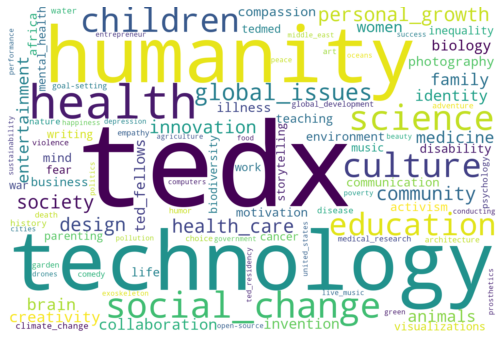

In [143]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white',
                      width=1500,
                      height=1000
                      ).generate_from_frequencies(freq_inspiring_topics)

plt.figure(figsize=(9,6))

plt.imshow(wordcloud, interpolation='bilinear')
# interpolation makes the figure smoother
# different interpolation options are given here:
# https://matplotlib.org/gallery/images_contours_and_fields/interpolation_methods.html


plt.axis('off')
plt.show()